In [424]:
!git clone https://github.com/kaapthijs/DMT-A1.git


Cloning into 'DMT-A1'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 91 (delta 28), reused 41 (delta 12), pack-reused 31
Receiving objects: 100% (91/91), 30.48 MiB | 12.96 MiB/s, done.
Resolving deltas: 100% (42/42), done.


In [426]:
import os
os.chdir('DMT-A1')

SEED: 60


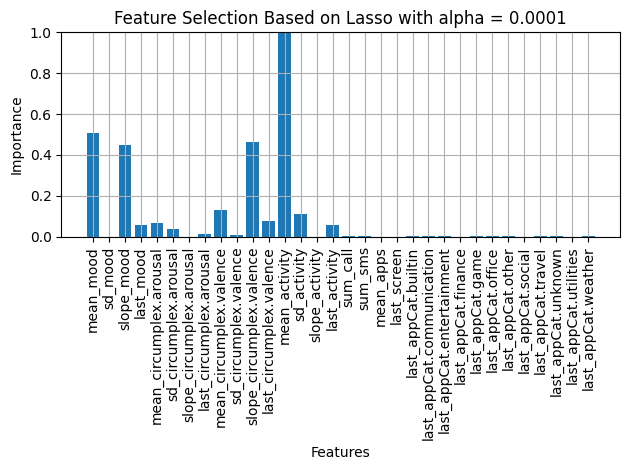

In [427]:
import pandas as pd
import numpy as np
from feature_engineering import create_features,select_features
import random

#SEED = np.random.randint(100)
SEED = 60
np.random.seed(SEED), random.seed(SEED)
print(f"SEED: {SEED}")
#pd.set_option('future.no_silent_downcasting', True)
dataset = pd.read_csv('./cleaned_dataset.csv')
# Creating features
X, y = create_features(dataset,window_size=3)
#Select some of the features
features = select_features(X, y, SEED)


In [428]:
X_features_selected = X[features]

In [430]:
X_features_selected.shape

(1250, 21)

In [362]:
X.shape, y.shape

((1250, 32), (1250, 1))

In [363]:
X.columns

Index(['mean_mood', 'sd_mood', 'slope_mood', 'last_mood',
       'mean_circumplex.arousal', 'sd_circumplex.arousal',
       'slope_circumplex.arousal', 'last_circumplex.arousal',
       'mean_circumplex.valence', 'sd_circumplex.valence',
       'slope_circumplex.valence', 'last_circumplex.valence', 'mean_activity',
       'sd_activity', 'slope_activity', 'last_activity', 'sum_call', 'sum_sms',
       'mean_apps', 'last_screen', 'last_appCat.builtin',
       'last_appCat.communication', 'last_appCat.entertainment',
       'last_appCat.finance', 'last_appCat.game', 'last_appCat.office',
       'last_appCat.other', 'last_appCat.social', 'last_appCat.travel',
       'last_appCat.unknown', 'last_appCat.utilities', 'last_appCat.weather'],
      dtype='object')

In [201]:
X_dropped = X.drop(columns= ['last_appCat.builtin',
       'last_appCat.communication', 'last_appCat.entertainment',
       'last_appCat.finance', 'last_appCat.game', 'last_appCat.office',
       'last_appCat.other', 'last_appCat.social', 'last_appCat.travel',
       'last_appCat.unknown', 'last_appCat.utilities', 'last_appCat.weather'])
X_dropped.columns

Index(['mean_mood', 'sd_mood', 'slope_mood', 'last_mood',
       'mean_circumplex.arousal', 'sd_circumplex.arousal',
       'slope_circumplex.arousal', 'last_circumplex.arousal',
       'mean_circumplex.valence', 'sd_circumplex.valence',
       'slope_circumplex.valence', 'last_circumplex.valence', 'mean_activity',
       'sd_activity', 'slope_activity', 'last_activity', 'sum_call', 'sum_sms',
       'mean_apps', 'last_screen'],
      dtype='object')

In [202]:
X.head()

,mean_mood,sd_mood,slope_mood,last_mood,mean_circumplex.arousal,sd_circumplex.arousal,slope_circumplex.arousal,last_circumplex.arousal,mean_circumplex.valence,sd_circumplex.valence,...,last_appCat.entertainment,last_appCat.finance,last_appCat.game,last_appCat.office,last_appCat.other,last_appCat.social,last_appCat.travel,last_appCat.unknown,last_appCat.utilities,last_appCat.weather
0,6.250000,0.433013,0.3,7.000000,-0.25,0.829156,0.7,1.0,0.750000,0.433013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.333333,0.471405,0.5,7.000000,0.00,1.414214,1.5,1.0,0.333333,0.471405,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6.926829,0.000000,0.0,6.926829,0.00,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.731707,0.000000,0.0,6.731707,0.00,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6.536585,0.000000,0.0,6.536585,0.00,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [203]:
y.head()

,mood
0,6.333333
1,6.926829
2,6.731707
3,6.536585
4,6.341463


In [431]:
X_features_selected['mood_target'] = y

<ipython-input-431-bbb39b3dd9bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_features_selected['mood_target'] = y


In [432]:
#create sequences for the LSTM
def create_sequences(X, y, sequence_length=5):
    X_final= []
    y_final = []
    for i in range(len(X) - sequence_length):
        X_final.append(X.iloc[i:i + sequence_length, :].values)
        y_final.append(y.iloc[i:i + sequence_length])
    return np.array(X_final), np.array(y_final)

X_seq, y_seq = create_sequences(X_features_selected, y, sequence_length=5)


In [433]:
X_seq_last_feature = X_seq[:,:,-1]
X_seq_last_feature.reshape(-1,5,1).shape

(1245, 5, 1)

In [434]:
X_seq.shape,y_seq.shape

((1245, 5, 22), (1245, 5, 1))

In [435]:
X_seq_last_feature[:5,4]

array([7.8125    , 7.81818182, 7.75      , 6.27272727, 7.8       ])

In [436]:
y_seq[:5,4]

array([[7.8125    ],
       [7.81818182],
       [7.75      ],
       [6.27272727],
       [7.8       ]])

In [437]:
from sklearn.model_selection import train_test_split

#custom train test split for sequential data
def train_test_split_custom(data, train_size=0.8):
    split_idx = int(len(data) * train_size)
    train = data[:split_idx]
    test = data[split_idx:]
    return train, test


'''
X_train, X_test = train_test_split(X_seq, train_size=0.75, stratify = (y_seq[:,-1] > 7.5).astype(int))
y_train, y_test = train_test_split(y_seq, train_size=0.75,stratify = (y_seq[:,-1] > 7.5).astype(int))
X_train.shape,y_train.shape, X_test.shape,y_test.shape
'''
X_train, X_test = train_test_split_custom(X_seq, train_size=0.8)
y_train, y_test = train_test_split_custom(y[4:-1], train_size=0.8)
X_train.shape,y_train.shape, X_test.shape,y_test.shape



((996, 5, 22), (996, 1), (249, 5, 22), (249, 1))

In [438]:
X_train[0,:,-1],y_train[:1]

(array([6.73170732, 6.53658537, 6.34146341, 6.14634146, 7.8125    ]),
      mood
 4  7.8125)

In [439]:
#normalize the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train.reshape(-1,X_train.shape[2]))

X_train_scaled = scaler.transform(np.reshape(X_train, (-1, X_train.shape[2])))
X_test_scaled = scaler.transform(np.reshape(X_test, (-1, X_test.shape[2])))

# Reshape back to the original dimensions
X_train_scaled = np.reshape(X_train_scaled, X_train.shape)
X_test_scaled = np.reshape(X_test_scaled, X_test.shape)

In [440]:
##Classification task y_train discritizer
y_train_binary = (y_train > 7.5).astype(int)
y_test_binary = (y_test > 7.5).astype(int)

In [441]:
X_train_scaled.shape,y_train_binary.shape,X_test_scaled.shape,y_test_binary.shape

((996, 5, 22), (996, 1), (249, 5, 22), (249, 1))

In [442]:
X_train[:5,4,-1],y_train[:5],y_train_binary[:5]

(array([7.8125    , 7.81818182, 7.75      , 6.27272727, 7.8       ]),
        mood
 4  7.812500
 5  7.818182
 6  7.750000
 7  6.272727
 8  7.800000,
    mood
 4     1
 5     1
 6     1
 7     0
 8     1)

In [443]:
np.sum(y_train_binary),len(y_train)

(mood    190
 dtype: int64,
 996)

In [465]:
from tensorflow.keras.layers import Dropout, LSTM, Dense,Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.layers import GRU



timesteps = X_train_scaled.shape[1]  # Number of timesteps in the input/output sequence
features = X_train_scaled.shape[2] # Number of features in the input
output_units = 1  # Output dimension (1 for binary classification at each timestep)




model1 = Sequential([
    LSTM(10, input_shape=(timesteps, features)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




model2 = Sequential([
    LSTM(100, return_sequences=True,input_shape=(timesteps, features)),
    Dropout(0.5),
    LSTM(100),
    Dense(1, activation='sigmoid')
])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




model3 = Sequential([
    Bidirectional(LSTM(30), input_shape=(timesteps, features)),
    Dense(1, activation='sigmoid')
])
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




model4 = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(timesteps, features)),
    MaxPooling1D(pool_size=2),
    LSTM(50),
    Dense(1, activation='sigmoid')
])
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model5 = Sequential([
    SimpleRNN(10, input_shape=(timesteps, features)),  # Smaller RNN unit
    Dense(1, activation='sigmoid')
])
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model6 = Sequential([
    GRU(50, input_shape=(timesteps, features)),  # Similar to LSTM but usually faster
    Dense(1, activation='sigmoid')
])
model6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



model7 = Sequential([
    SimpleRNN(50, input_shape=(timesteps, features), return_sequences=True),
    Dropout(0.5),
    SimpleRNN(50),The
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model7.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model8 = Sequential([
    Bidirectional(SimpleRNN(50), input_shape=(timesteps, features)),
    Dense(1, activation='sigmoid')
])
model8.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])










In [498]:

model2 = Sequential([
    LSTM(100, return_sequences=True,input_shape=(timesteps, features)),
    Dropout(0.5),
    LSTM(100),
    Dense(1, activation='sigmoid')
])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model = model2
model.summary()



Model: "sequential_146"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_100 (LSTM)             (None, 5, 100)            49200     
                                                                 
 dropout_56 (Dropout)        (None, 5, 100)            0         
                                                                 
 lstm_101 (LSTM)             (None, 100)               80400     
                                                                 
 dense_146 (Dense)           (None, 1)                 101       
                                                                 
Total params: 129701 (506.64 KB)
Trainable params: 129701 (506.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [496]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Set up the ModelCheckpoint callback to save the best model during training
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',   # Monitor validation loss to decide when to save
    mode='min',           # Save the model when the monitored metric has minimized
    save_best_only=True)  # Only save the best model

# Optionally, add EarlyStopping to halt training when validation performance degrades
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=10,          # Number of epochs with no improvement after which training will be stopped
    mode='min',
    verbose=1)


In [497]:
class_weight_dict = {0: 1, 1: 4}

In [499]:
history = model.fit(
    X_train_scaled,
    y_train_binary,            # Training data and labels
    epochs=17,                   # Number of epochs to train for
    batch_size=16,               # Batch size for training
    validation_split=0.25,        # Fraction of data to use for validation
    verbose=1,                   # Show detailed progress in the output
    #class_weight = class_weight_dict,
    callbacks = [early_stopping_callback,model_checkpoint_callback]
)


Epoch 1/17
47/47 [==============================] - 5s 31ms/step - loss: 0.5121 - accuracy: 0.8153 - val_loss: 0.5088 - val_accuracy: 0.7952
Epoch 2/17
47/47 [==============================] - 1s 11ms/step - loss: 0.4649 - accuracy: 0.8139 - val_loss: 0.4856 - val_accuracy: 0.7952
Epoch 3/17
47/47 [==============================] - 1s 11ms/step - loss: 0.4407 - accuracy: 0.8179 - val_loss: 0.4878 - val_accuracy: 0.8153
Epoch 4/17
47/47 [==============================] - 1s 11ms/step - loss: 0.4382 - accuracy: 0.8166 - val_loss: 0.5207 - val_accuracy: 0.7952
Epoch 5/17
47/47 [==============================] - 1s 12ms/step - loss: 0.4203 - accuracy: 0.8206 - val_loss: 0.4744 - val_accuracy: 0.7992
Epoch 6/17
47/47 [==============================] - 1s 11ms/step - loss: 0.4214 - accuracy: 0.8206 - val_loss: 0.4545 - val_accuracy: 0.8153
Epoch 7/17
47/47 [==============================] - 1s 11ms/step - loss: 0.4088 - accuracy: 0.8286 - val_loss: 0.5298 - val_accuracy: 0.7952
Epoch 8/17
47

In [490]:
X_test_scaled.shape,y_test_binary.shape

((249, 5, 22), (249, 1))

In [491]:
X_test[:5,4,-1],y_test[:5],y_test_binary[:5]

(array([7. , 7. , 7.8, 7.4, 7.5]),
       mood
 1000   7.0
 1001   7.0
 1002   7.8
 1003   7.4
 1004   7.5,
       mood
 1000     0
 1001     0
 1002     1
 1003     0
 1004     0)

In [492]:

model.load_weights(checkpoint_filepath)
y_pred_probs = model.predict(X_test_scaled)  # Get probability scores
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary labels

8/8 [==============================] - 1s 5ms/step


In [493]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test_binary, y_pred, target_names=['Class 0', 'Class 1'])
print(report)

              precision    recall  f1-score   support

     Class 0       0.77      0.93      0.84       151
     Class 1       0.84      0.58      0.69        98

    accuracy                           0.79       249
   macro avg       0.81      0.75      0.77       249
weighted avg       0.80      0.79      0.78       249



Accuracy score: 0.79
F1 score: 0.78
Classification Report:
              precision    recall  f1-score   support

    Low mood       0.77      0.93      0.84       151
   High mood       0.84      0.58      0.69        98

    accuracy                           0.79       249
   macro avg       0.81      0.75      0.77       249
weighted avg       0.80      0.79      0.78       249

Confusion Matrix:
[[140  11]
 [ 41  57]]


<Figure size 1000x800 with 0 Axes>

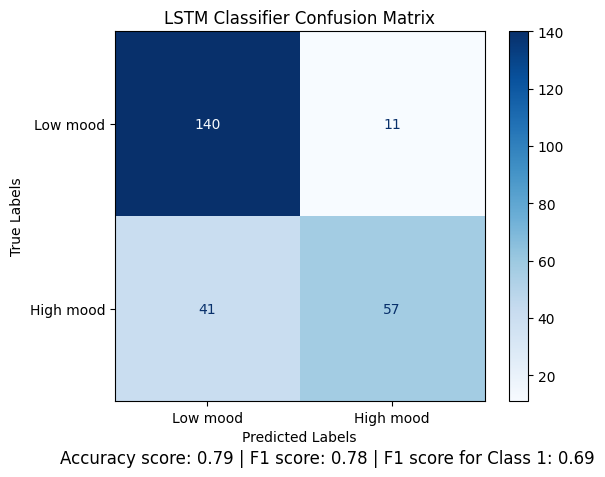

'              precision    recall  f1-score   support\n\n    Low mood       0.77      0.93      0.84       151\n   High mood       0.84      0.58      0.69        98\n\n    accuracy                           0.79       249\n   macro avg       0.81      0.75      0.77       249\nweighted avg       0.80      0.79      0.78       249\n'

In [494]:

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score, precision_recall_fscore_support

def evaluate(y_test, y_pred, model, title):
    class_labels = ['Low mood', 'High mood']
    # Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    # Compute F1 score specifically for Class 1
    _, _, f1_scores, _ = precision_recall_fscore_support(y_test, y_pred, average=None)
    f1_class1 = f1_scores[1]  # F1 score for Class 1

    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f'Accuracy score: {accuracy:.2f}')
    print(f'F1 score: {f1:.2f}')
    print("Classification Report:")
    class_report = classification_report(y_test, y_pred, target_names=class_labels)
    print(class_report)
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))  # Set the figure size
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    ax = disp.plot(cmap=plt.cm.Blues).ax_  # Using a blue color map for the confusion matrix
    ax.set_title(title)
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')

    # Adjust the text annotation below the plot
    plt.gcf().text(0.5, 0.01, f'Accuracy score: {accuracy:.2f} | F1 score: {f1:.2f} | F1 score for Class 1: {f1_class1:.2f}',
                   ha='center', fontsize=12, verticalalignment='top')
    plt.show()

    return class_report

# Usage example:
title = 'LSTM Classifier Confusion Matrix'
evaluate(y_test_binary, y_pred, model, title)

8/8 [==============================] - 0s 3ms/step


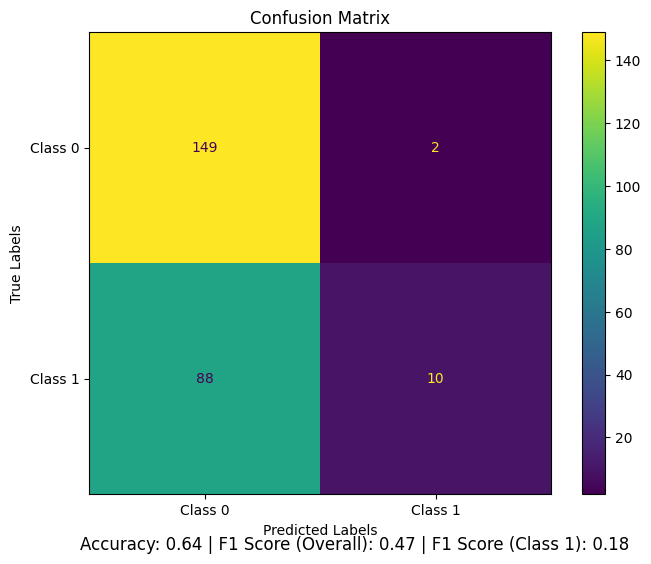

In [413]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, ConfusionMatrixDisplay

# Prediction and metrics calculation
y_test_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
accuracy = accuracy_score(y_test_binary, y_test_pred)
f1 = f1_score(y_test_binary, y_test_pred, average='macro')
f1_class1 = f1_score(y_test_binary, y_test_pred, pos_label=1)

# Confusion matrix plotting
cm = confusion_matrix(y_test_binary, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax)
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

# Adding text below the confusion matrix
plt.gcf().text(0.5, 0.01, f'Accuracy: {accuracy:.2f} | F1 Score (Overall): {f1:.2f} | F1 Score (Class 1): {f1_class1:.2f}', ha='center', va='bottom', fontsize=12)
plt.show()


Model: "sequential_116"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_76 (LSTM)              (None, 10)                1280      
                                                                 
 dropout_43 (Dropout)        (None, 10)                0         
                                                                 
 dense_116 (Dense)           (None, 1)                 11        
                                                                 
Total params: 1291 (5.04 KB)
Trainable params: 1291 (5.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
935/935 [==============================] - 9s 5ms/step - loss: 1.0804 - accuracy: 0.6513 - val_loss: 0.6556 - val_accuracy: 0.6538
Epoch 2/30
935/935 [==============================] - 3s 4ms/step - loss: 0.9841 - accuracy: 0.6963 - val_loss: 0.6815 - val_accuracy: 0.5865


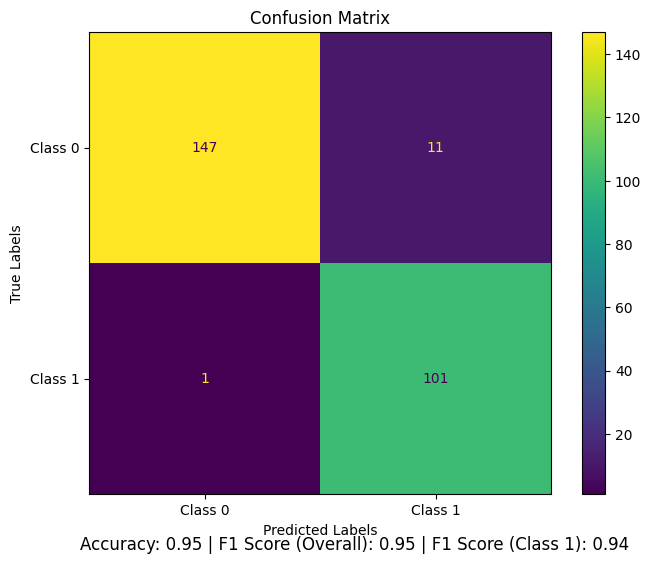

In [357]:
###########Combined into full code##################

from tensorflow.keras.layers import Dropout, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

timesteps = X_train_scaled.shape[1]  # Number of timesteps in the input/output sequence
features = X_train_scaled.shape[2] # Number of features in the input
output_units = 1  # Output dimension (1 for binary classification at each timestep)




model1 = Sequential([
    LSTM(10, input_shape=(timesteps, features)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




model2 = Sequential([
    LSTM(50, return_sequences=True,input_shape=(timesteps, features)),
    LSTM(50),
    Dense(1, activation='sigmoid')
])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




model3 = Sequential([
    Bidirectional(LSTM(50), input_shape=(timesteps, features)),
    Dense(1, activation='sigmoid')
])
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




model4 = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(timesteps, features)),
    MaxPooling1D(pool_size=2),
    LSTM(50),
    Dense(1, activation='sigmoid')
])
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])






model = model1
epochs = 30
model.summary()



class_weight_dict = {0: 1, 1: 4.5}


history = model.fit(
    X_train_scaled,
    y_train_binary,            # Training data and labels
    epochs=epochs,                   # Number of epochs to train for
    batch_size=1,               # Batch size for training
    validation_split=0.1,        # Fraction of data to use for validation
    verbose=1,                   # Show detailed progress in the output
    class_weight = class_weight_dict
)

y_pred_probs = model.predict(X_test_scaled)  # Get probability scores
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary labels

from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test_binary, y_pred, target_names=['Class 0', 'Class 1'])
print(report)


import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, ConfusionMatrixDisplay

# Prediction and metrics calculation
y_test_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
accuracy = accuracy_score(y_test_binary, y_test_pred)
f1 = f1_score(y_test_binary, y_test_pred, average='macro')
f1_class1 = f1_score(y_test_binary, y_test_pred, pos_label=1)

# Confusion matrix plotting
cm = confusion_matrix(y_test_binary, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax)
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

# Adding text below the confusion matrix
plt.gcf().text(0.5, 0.01, f'Accuracy: {accuracy:.2f} | F1 Score (Overall): {f1:.2f} | F1 Score (Class 1): {f1_class1:.2f}', ha='center', va='bottom', fontsize=12)
plt.show()
